# Goal-Based Repository Analysis

This notebook analyzes the classified repository data from `classified_gov_repositories_goal_based.csv` to identify which repositories are most relevant to a set of predefined strategic goals. 

We will explore:
1.  The overall distribution of scores for each goal.
2.  The top-scoring repositories for each individual goal.
3.  High-impact repositories that score well across multiple goals.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing of text columns
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_colwidth', 1000)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Load and Prepare Data

First, we load the dataset and prepare it for analysis. This involves identifying the score and reason columns and ensuring the scores are in a numeric format.

In [11]:
file_path = '/home/theo/projects/iai/data/20250624_223620_a910a8e1/classified_gov_repositories_goal_based.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    # Create an empty dataframe to avoid further errors in the notebook
    df = pd.DataFrame()

# Identify goal-related columns
goal_prefixes = [
    'economic_growth_and_stability',
    'healthcare_modernisation',
    'national_security_and_border_control',
    'energy_security_and_net_zero',
    'education_and_skills'
]

score_cols = [f"{prefix}_score" for prefix in goal_prefixes]
reason_cols = [f"{prefix}_reason" for prefix in goal_prefixes]

# Convert score columns to numeric, coercing errors to NaN
for col in score_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data loaded and prepared. Displaying first 5 rows:")
df.head()

Data loaded and prepared. Displaying first 5 rows:


,account,name,description,stars,forks,language,url,readme,last_scanned_utc,created_at,...,economic_growth_and_stability_score,economic_growth_and_stability_reason,healthcare_modernisation_score,healthcare_modernisation_reason,national_security_and_border_control_score,national_security_and_border_control_reason,energy_security_and_net_zero_score,energy_security_and_net_zero_reason,education_and_skills_score,education_and_skills_reason
0,NationalSecurityAgency,ghidra,Ghidra is a software reverse engineering (SRE) framework,58059,6488,Java,https://github.com/NationalSecurityAgency/ghidra,"<img src=""Ghidra/Features/Base/src/main/resources/images/GHIDRA_3.png"" width=""400"">\n\n# Ghidra Software Reverse Engineering Framework\nGhidra is a software reverse engineering (SRE) framework created and maintained by the \n[National Security Agency][nsa] Research Directorate. This framework includes a suite of \nfull-featured, high-end software analysis tools that enable users to analyze compiled code on a \nvariety of platforms including Windows, macOS, and Linux. Capabilities include disassembly, \nassembly, decompilation, graphing, and scripting, along with hundreds of other features. Ghidra \nsupports a wide variety of processor instruction sets and executable formats and can be run in both \nuser-interactive and automated modes. Users may also develop their own Ghidra extension components \nand/or scripts using Java or Python.\n\nIn support of NSA's Cybersecurity mission, Ghidra was built to solve scaling and teaming problems \non complex SRE efforts, and to provide a custom...",2025-06-24T22:14:40.925653Z,2019-03-01T03:27:48Z,...,1,"Ghidra is a reverse engineering tool. While it could be used to analyze financial software for security vulnerabilities, its primary purpose doesn't directly support economic analysis, business support, or public sector efficiency in the ways implied by the goal.",0,"Ghidra is a software reverse engineering framework. It has no direct application in healthcare modernization, patient care, operational streamlining, or waiting list reduction within the NHS.",4,"Software reverse engineering is crucial for cybersecurity analysis, identifying vulnerabilities in critical infrastructure, and understanding malware. This directly supports national security by enabling the defense against cyber threats and law enforcement investigations.",0,"Ghidra is a software reverse engineering tool and has no direct relevance to renewable energy technology, grid management, or climate data analysis for achieving Net Zero goals.",3,"Ghidra can be used as a powerful tool for teaching advanced computer science concepts like operating systems, compiler design, and cybersecurity. Its availability as an open-source framework also provides valuable hands-on experience for students and professionals looking to develop skills in software analysis and security."
1,opencti-platform,opencti,Open Cyber Threat Intelligence Platform,7429,1065,TypeScript,https://github.com/OpenCTI-Platform/opencti,"<h1 align=""center"">\n <a href=""https://opencti.io""><img src=""./.github/img/logo_opencti.png"" alt=""OpenCTI""></a>\n</h1>\n<p align=""center"">\n <a href=""https://opencti.io"" alt=""Website""><img src=""https://img.shields.io/badge/website-opencti.io-blue.svg"" /></a>\n <a href=""https://docs.opencti.io"" alt=""Documentation""><img src=""https://img.shields.io/badge/documentation-latest-orange.svg"" /></a>\n <a href=""https://community.filigran.io"" alt=""Slack""><img src=""https://img.shields.io/badge/slack-3K%2B%20members-4A154B"" /></a>\n <a href=""https://drone.filigran.io/OpenCTI-Platform/opencti""><img src=""https://drone.filigran.io/api/badges/OpenCTI-Platform/opencti/status.svg"" /></a>\n <a href=""https://codecov.io/gh/OpenCTI-Platform/opencti""><img src=""https://codecov.io/gh/OpenCTI-Platform/opencti/graph/ba",2025-06-26T23:03:03.492890Z,2018-12-17T22:57:34Z,...,1,"While improved cybersecurity can indirectly support economic stabi

## 2. Overall Score Distribution

Let's visualize the distribution of scores for each goal to get a general sense of how repositories were rated.

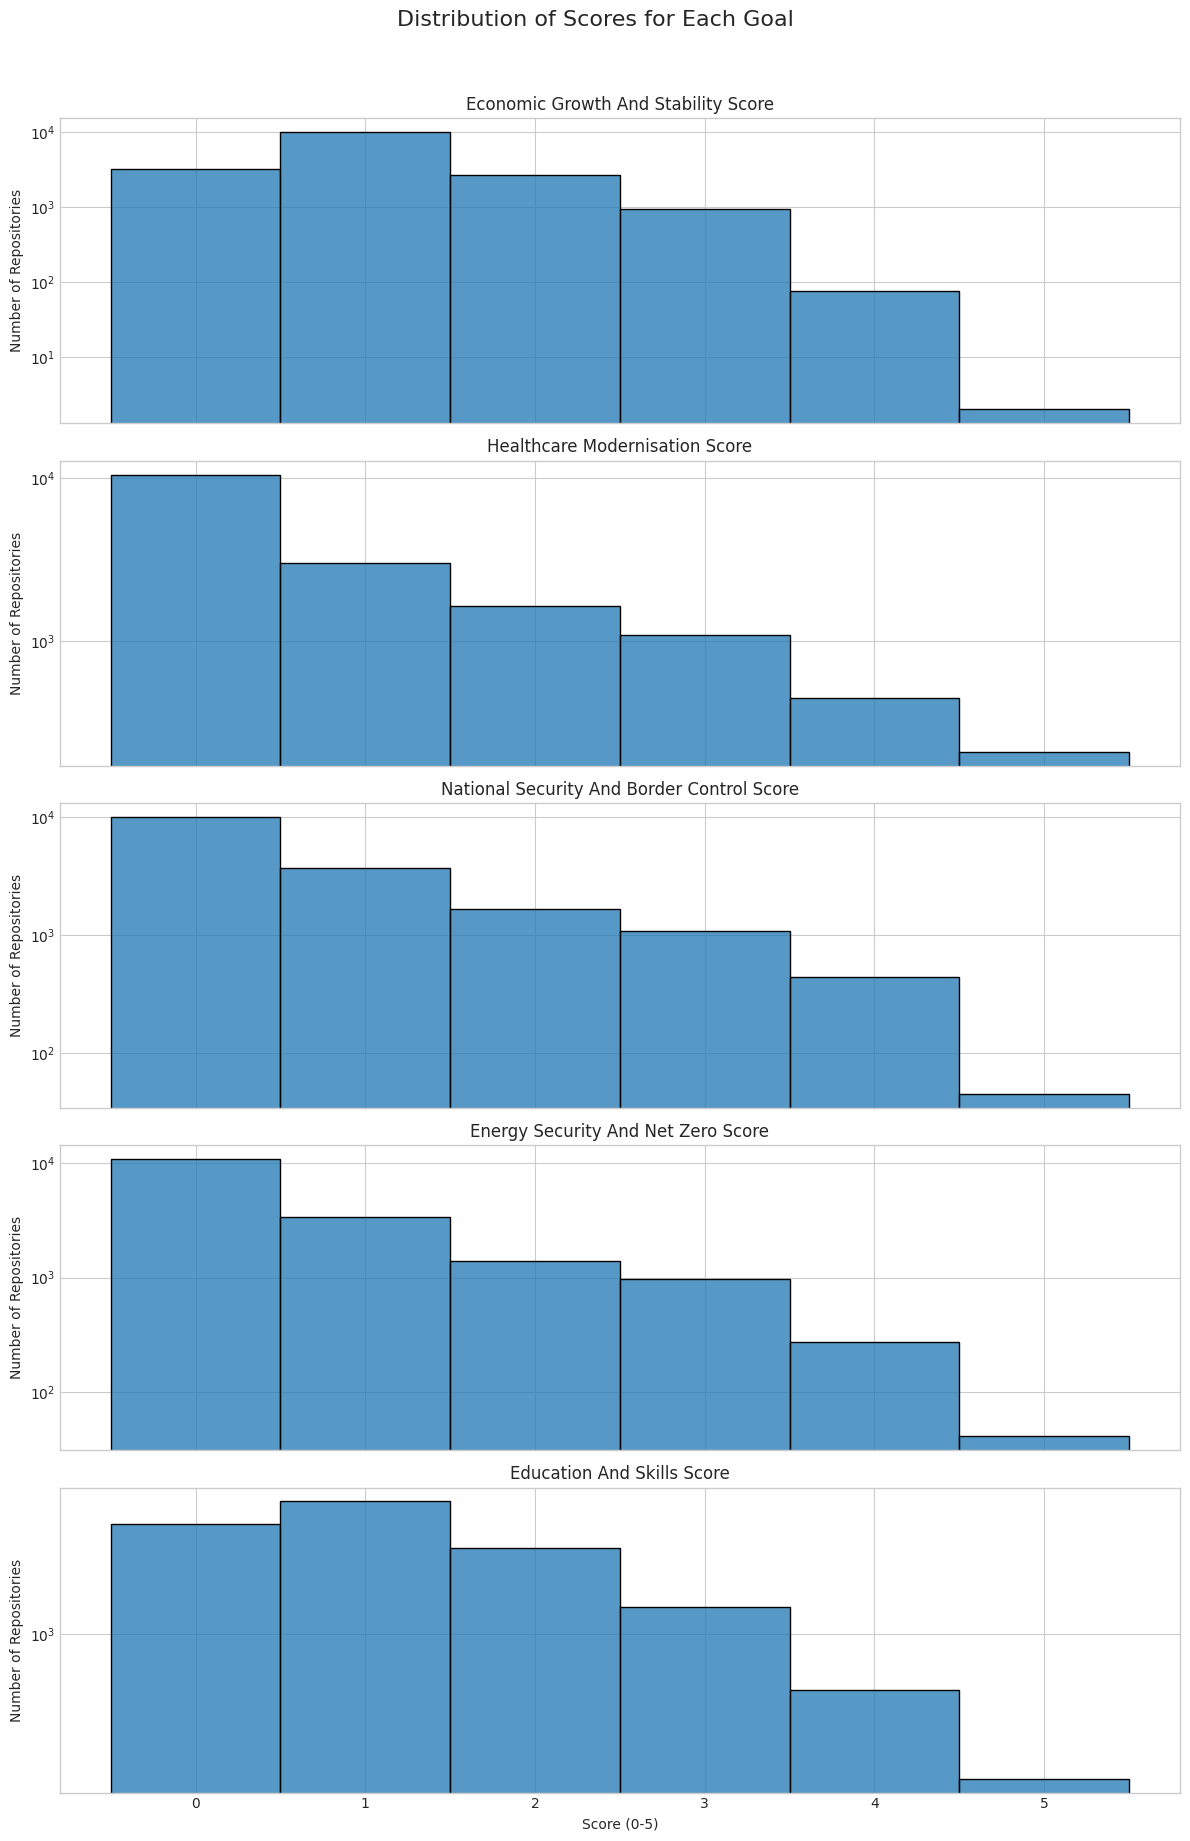

In [18]:
if not df.empty:
    fig, axes = plt.subplots(len(score_cols), 1, figsize=(12, 18), sharex=True)
    fig.suptitle('Distribution of Scores for Each Goal', fontsize=16, y=1.02)

    for i, col in enumerate(score_cols):
        if col in df.columns:
            sns.histplot(df[col].dropna(), ax=axes[i], bins=np.arange(0, 6.5, 1), kde=False, discrete=True)
            axes[i].set_title(col.replace('_', ' ').title())
            axes[i].set_xlabel('Score (0-5)')
            axes[i].set_ylabel('Number of Repositories')
            axes[i].set_yscale('log')
            axes[i].set_xticks(np.arange(0, 6, 1))
        else:
            axes[i].set_title(f'{col} not found')
            axes[i].axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()
else:
    print("DataFrame is empty, skipping visualization.")

## 3. Top Repositories Per Goal

Now, let's identify the top-scoring repositories for each individual goal. We'll display the repository name, its score, and the reason provided by the LLM for that score.

In [19]:
if not df.empty:
    for prefix in goal_prefixes:
        score_col = f'{prefix}_score'
        reason_col = f'{prefix}_reason'
        
        if score_col in df.columns and reason_col in df.columns:
            # Filter for repositories with a score > 0 to find relevant ones
            relevant_repos = df[df[score_col] > 0].copy()
            
            if not relevant_repos.empty:
                top_repos = relevant_repos.sort_values(by=[score_col, 'created_at'], ascending=[False, False]).head(5)
                # top_repos = relevant_repos.sort_values(by=[score_col], ascending=[False]).head(5)
                
                print("-" * 80)
                print(f"🏆 Top Repositories for: {prefix.replace('_', ' ').title()}")
                print("-" * 80)
                
                # Use display() for better formatting in Jupyter
                display(top_repos[['name', 'summary', 'created_at', score_col, reason_col]].reset_index(drop=True))
                print("\n" * 2)
            else:
                print(f"\nNo repositories found with a score > 0 for {prefix.replace('_', ' ').title()}\n")
else:
    print("DataFrame is empty, skipping analysis.")

--------------------------------------------------------------------------------
🏆 Top Repositories for: Economic Growth And Stability
--------------------------------------------------------------------------------


,name,summary,created_at,economic_growth_and_stability_score,economic_growth_and_stability_reason
0,obr-macro-model,This repository provides a Python version of the Office for Budget Responsibility's UK macroeconomic model. It allows users to work with the model in Python. Installation requires Poetry. Pre-commit hooks ensure code quality before commits.,2023-01-23T20:19:33Z,5,"The repository contains the UK's macroeconomic model, directly enabling financial analysis. This tool is crucial for understanding and influencing economic growth and stability, and for informing fiscal policy to manage national debt and inflation."
1,Mesange,"The Mesange macroeconomic model, jointly developed by Insee and DG Trésor, enables ex-ante evaluations of the impact of economic policy measures on macroeconomic variables like employment, GDP, and prices. It also models the consequences of external shocks, such as exchange rate or oil price fluctuations. The model uses the TROLL econometric software and the HENDYPLAN TOOLBOX.",2018-08-29T07:10:48Z,5,"The Mesange model is explicitly designed for ex-ante evaluations of economic policy measures impacting GDP, employment, and prices. This directly supports the goal of contributing to a stronger UK economy by providing tools for financial analysis and potentially influencing policies to control inflation and foster stability."
2,centers-reports,This repository provides parameterized reports for Regional Growth Centers. It enables the generation of customizable reports. The reports are designed to support the analysis and understanding of regional growth. The parameters allow for flexible report generation tailored to specific needs.,2025-06-03T20:59:32Z,4,The repository's focus on parameterized reports for Regional Growth Centers directly supports the analysis and understanding of regional economic activity. This can inform policy decisions aimed at fostering economic growth and stability within specific regions of the UK.
3,ETR_GMT_replication,"This repository facilitates the replication of research on effective tax rates (ETRs) and firm size, focusing on the impact of global minimum taxes. The analysis uses firm-level tax data from 16 countries to show a non-linear relationship between ETRs and firm size. The research reveals that mid-sized firms have the highest ETRs, while the largest firms benefit from lower rates. The repository provides the necessary information for reproducing the study's findings.",2025-03-07T14:17:15Z,4,"Understanding the relationship between firm size and effective tax rates, especially in the context of global minimum taxes, is crucial for economic policy. This research can inform tax strategies that support businesses, potentially leading to increased investment and economic growth. It also provides insights into factors influencing national debt and inflation through tax revenue."
4,tourism-indicators,"This web dashboard provides a comprehensive overview of Yukon's tourism sector performance. It displays key performance indicators such as airport arrivals, border crossings, and economic data. Users can explore various metrics across different tourism domains via a user-friendly interface. Additional indicators include hotel and short-term rental data. The dashboard offers detailed views of specific data points.",2025-03-04T20:21:37Z,4,"The dashboard provides critical economic data for Yukon's tourism sector, including airport arrivals, border crossings, and hotel occupancy. This information is vital for understanding economic performance and identifying opportunities for growth and stability within the sector."





--------------------------------------------------------------------------------
🏆 Top Repositories for: Healthcare Modernisation
--------------------------------------------------------------------------------


,name,summary,created_at,healthcare_modernisation_score,healthcare_modernisation_reason
0,ai,This repository provides an AI framework for NHS England. It aims to establish a standardized approach to the development and implementation of artificial intelligence within the NHS. The framework offers a structured process for utilizing AI in healthcare. It supports the responsible and ethical use of AI to improve patient care and operational efficiency.,2025-06-19T08:22:31Z,5,"This repository is directly focused on establishing a standardized AI framework for the NHS, aiming to improve patient care and operational efficiency. This is a core objective of healthcare modernization, leveraging new technologies to enhance service delivery."
1,excode,The `excode` R package facilitates excess count detection within epidemiological time series data. It provides tools for identifying unusual increases in counts compared to expected levels. This enables improved surveillance and early detection of potential outbreaks or other significant events. The package is developed by the Robert Koch-Institut.,2025-04-30T13:34:38Z,5,The `excode` package directly supports public health surveillance by enabling early detection of potential outbreaks. This is a critical component of modernizing healthcare systems by improving responsiveness and proactive management of health events.
2,dtos-manage-breast-screening,"This web application manages breast screening clinics. It allows viewing and managing daily clinic lists, tracking participant progress through the screening process, and managing participant information and status. The application is designed for efficient clinic administration. Setup requires Docker or Podman and asdf.",2025-03-28T11:11:05Z,5,"This repository directly supports NHS goals by providing a digital tool to manage breast screening clinics. It streamlines operations, tracks participant progress, and improves administrative efficiency, all key aspects of healthcare modernization."
3,bcss-notifications,"This repository provides serverless functions, deployable to AWS Lambda, for sending batch notifications from the Bowel Cancer Screening System. The functions retrieve recipient data from a BCSS Oracle database and send pre-invitation notifications based on recipient history (previous cancer diagnosis or not). Two notification templates are used. Scheduled daily executions at 8:00 and 9:00 AM ensure timely notification delivery.",2025-01-30T09:28:10Z,5,This project directly supports the NHS by modernising the Bowel Cancer Screening System through digital notification delivery. Automating and streamlining the pre-invitation process improves operational efficiency and likely contributes to better patient engagement and timely screening.
4,dtos-participant-manager,Manage your screening (MAYS) is a service enabling users to view their eligible screenings and upcoming appointment dates. It uses NHS login for authentication and comprises Azure functions and a Next.js user interface. The system provides a centralized view of screening information for users.,2025-01-15T10:05:31Z,5,"This repository directly supports the NHS by providing a digital tool for users to manage their health screenings and appointments. It streamlines access to important healthcare information, contributing to improved patient experience and potentially operational efficiency within the NHS."





--------------------------------------------------------------------------------
🏆 Top Repositories for: National Security And Border Control
--------------------------------------------------------------------------------


,name,summary,created_at,national_security_and_border_control_score,national_security_and_border_control_reason
0,cyber-security-reference-architecture,This repository provides a cybersecurity reference architecture. It offers a framework for designing and implementing secure systems. The architecture aids in building robust and resilient cybersecurity solutions. It serves as a guide for establishing secure infrastructures. The goal is to improve overall cybersecurity posture.,2025-02-24T19:35:30Z,5,"This repository is highly relevant as it directly addresses cybersecurity, which is a critical component of national security. Protecting critical national infrastructure and government systems is paramount for border control and overall national defense."
1,data-encrypt-system,"This system provides a secure data transmission and storage solution using Sha3_256 and HMAC encryption. It offers customizable encryption for sensitive data, ensuring data integrity and confidentiality during both transmission and storage. The Sha3_256 module handles two parameters using salting and Base64 encoding, while the HMAC module encrypts multiple parameters with a fixed key. The system is designed to meet various security needs in different business scenarios.",2024-11-11T05:39:43Z,5,"This repository's focus on secure data transmission, storage, encryption, and integrity is directly relevant to national security. It provides foundational technology for protecting classified information, securing communication channels, and enhancing cybersecurity measures."
2,orc2timeline,orc2timeline processes DFIR-ORC generated archives containing Windows system artifacts. It creates a timeline for each host analyzed. The tool accepts one or more ORC files as input. This enables the generation of comprehensive timelines for incident response investigations.,2024-10-11T14:46:03Z,5,"This tool is highly relevant to national security and law enforcement. Processing system artifacts for incident response is a core function of cybersecurity and digital forensics within these domains, aiding in investigations and threat analysis."
3,naruto,Naruto is a Python toolkit that creates simulated WiFi drone signals to overwhelm counter-drone systems. It leverages the common use of WiFi in small drones to generate false targets using inexpensive hardware. The toolkit aims to confuse C-UAS systems that rely on RF analysis to detect and track drones. This is achieved by creating RF decoys of legitimate drone signals.,2024-07-29T04:06:22Z,5,"The repository directly addresses national security by providing tools to counter drone threats. Its purpose is to confuse counter-drone systems that rely on RF analysis, which is a direct application in defense and security."
4,GSI-utils-cloud,"This repository, GSI-Utils, offers a collection of utility tools for working with GSI (Global Security Infrastructure). The tools provide various functions to aid in GSI-related tasks. Installation instructions are available in the repository.",2024-04-17T02:10:24Z,5,"The repository's focus on 'Global Security Infrastructure (GSI)' and 'utility tools for working with GSI' directly aligns with national security. Such tools are foundational for managing and securing critical infrastructure, which is vital for national security and potentially border control."





--------------------------------------------------------------------------------
🏆 Top Repositories for: Energy Security And Net Zero
--------------------------------------------------------------------------------


,name,summary,created_at,energy_security_and_net_zero_score,energy_security_and_net_zero_reason
0,anemoi-pipeline,"The anemoi-pipeline repository provides a framework for processing ERA5 climate data. It facilitates the conversion of datasets to a standardized format, generation of neural network graphs, and training of graph neural network (GNN) models. The pipeline uses several interconnected modules (datasets, graphs, models, training, and utils) for a complete workflow. Demonstrations are provided via Jupyter notebooks to guide users through each stage.",2024-10-07T19:10:05Z,5,"The repository directly facilitates the processing of ERA5 climate data, which is crucial for understanding climate patterns and impacts. This knowledge is fundamental for developing strategies related to renewable energy, grid management, and achieving Net Zero targets."
1,Solar-Cell-Detection,"This repository provides a proof-of-concept algorithm for detecting solar energy assets in satellite imagery. It focuses on geographic areas with limited data, unlike those found in high-income countries. The algorithm aims to help meet national development goals and contribute to greenhouse gas emission reduction targets. The code allows for reproduction of the project's results.",2024-05-13T19:43:42Z,5,"This repository is highly relevant, directly contributing to renewable energy technology development and climate data analysis. Detecting solar energy assets, especially in data-scarce regions, supports the expansion of renewable energy sources and aids in greenhouse gas emission reduction, aligning perfectly with Net Zero goals and energy security."
2,pr_suivi_eolien,This repository provides monitoring protocols for wind farms. It offers procedures for tracking and monitoring wind farm performance. The protocols are designed for use with a monitoring module. The goal is to enable effective wind farm performance tracking.,2024-02-13T16:14:16Z,5,"This repository is highly relevant as it directly addresses the performance and monitoring of wind farms, a key component of renewable energy and the UK's transition to Net Zero. Effective monitoring protocols are essential for maximizing the output and reliability of wind energy, thereby enhancing energy security."
3,Sunscan,SunScan is an open-source project that estimates potential solar energy on rooftops. It uses satellite imagery and Meta's Segment Anything Model (SAM) for analysis. The project provides a tool to assess solar energy potential. A Colab notebook facilitates easy access and usage.,2023-11-29T19:20:09Z,5,This project directly supports the transition to Net Zero by providing a tool to assess and promote the adoption of solar energy. Enhancing renewable energy generation is crucial for both energy security and achieving climate targets.
4,climateknowledgeportal,"This repository documents the World Bank's Climate Change Knowledge Portal (CCKP), which offers open access to a vast collection of climate data. The portal provides pre-processed climate data, including basic variables and specialized indices, across various scenarios and timeframes. Users can extract data based on specific variables and scenarios for diverse applications. The data is derived from the latest climate archives and processed consistently for interoperability.",2023-11-01T23:35:52Z,5,"This repository directly supports the UK's transition to Net Zero by providing extensive climate data. This data is crucial for climate change analysis, adaptation strategies, and understanding the impacts of energy policies."





--------------------------------------------------------------------------------
🏆 Top Repositories for: Education And Skills
--------------------------------------------------------------------------------


,name,summary,created_at,education_and_skills_score,education_and_skills_reason
0,mbon_data_workshop_2025,"This repository provides a template for creating Carpentries Workbench lessons. It enables users to generate new lesson repositories and guides them through configuring the lesson's metadata, including title, keywords, and contact information. The template includes necessary files for citation, code of conduct, contributing guidelines, and licensing. It facilitates the creation of a functional lesson website via GitHub Pages.",2025-01-22T14:22:34Z,5,"This repository directly supports the advancement of education and skills by providing a template and guidance for creating structured, reproducible educational content. It facilitates the development of teaching materials that can be used to impart valuable skills, aligning perfectly with this goal."
1,das-coursetypes-api,The `das-coursetypes-api` repository provides an API for course types. It is likely used by the UK Government's Digital Apprenticeship Service. The repository emphasizes the importance of not committing sensitive information. A build status and quality gate status are provided.,2025-01-21T09:38:08Z,5,"This repository is a core component of the Digital Apprenticeship Service, which directly facilitates vocational training and skills development. The API for course types is fundamental to the operation of apprenticeship programs, directly impacting the education and skills landscape."
2,jod-urataidot-ui,"This repository hosts a browser-based career planning skills self-assessment tool. The tool allows users to evaluate their skills based on a national framework, receiving feedback and suggested exercises. It's publicly accessible without registration, enabling users to save their progress and revisit their responses later. The service aims to improve users' understanding and development of career planning skills. It uses React, Vite, Typescript, and other technologies for development.",2024-12-09T08:37:21Z,5,"This repository is highly relevant as it directly addresses the advancement of workforce skills through a user-friendly, self-assessment tool. It aims to improve individuals' understanding and development of career planning skills, aligning perfectly with educational and skills development objectives."
3,das-courses-jobs,"The das-courses-jobs repository is a project related to the Digital Apprenticeship Service of the UK Government. It aims to provide functionality for managing courses and jobs within the service. The repository includes build and quality status indicators. Crucially, it emphasizes the importance of *not* including sensitive information within the repository.",2024-11-22T16:52:32Z,5,"The repository is directly related to the Digital Apprenticeship Service, which is a key initiative for vocational training and workforce development in the UK. It aims to manage courses and jobs, directly supporting the advancement of educational pathways and skills acquisition for individuals."
4,geos-frontend,"This repository, Guia Edutec, is a front-end project providing access to educational resources. It includes technical documentation and links to related back-end and database projects. The project aims to offer a user-friendly interface for accessing educational materials. It is open-source and utilizes Docker.",2024-05-07T15:20:49Z,5,The repository is explicitly a front-end project providing access to educational resources with a user-friendly interface. This directly aligns with advancing the UK's education system and developing workforce skills through educational technology.


## 4. High-Impact Repositories Across All Goals

Some repositories might be relevant to multiple goals. Let's find these 'high-impact' repositories by calculating a total score across all goals. This helps identify versatile projects that could offer broad benefits.

In [20]:
if not df.empty and all(col in df.columns for col in score_cols):
    df['total_score'] = df[score_cols].sum(axis=1)
    
    high_impact_repos = df.sort_values(by='total_score', ascending=False).head(10)
    
    print("-" * 80)
    print("🚀 Top 10 High-Impact Repositories (by Total Score)")
    print("-" * 80)
    
    display(high_impact_repos[['name', 'summary', 'total_score'] + score_cols].reset_index(drop=True))
else:
    print("DataFrame is empty or missing score columns, skipping high-impact analysis.")

--------------------------------------------------------------------------------
🚀 Top 10 High-Impact Repositories (by Total Score)
--------------------------------------------------------------------------------


,name,summary,total_score,economic_growth_and_stability_score,healthcare_modernisation_score,national_security_and_border_control_score,energy_security_and_net_zero_score,education_and_skills_score
0,kurs-metode-validere,"This course teaches data validation and control techniques. It demonstrates how to use R functions to detect data errors in statistical production, analyzing control functions and their implementation. Participants will learn through lectures and hands-on R exercises, covering validation with the `validate`, `klassR`, and `Kos` packages. Prior R knowledge is required.",18,3,4,3,3,5
1,scikit-learn,"Scikit-learn is a Python library for machine learning. It provides various tools for data analysis and modeling. The library enables users to build and evaluate a wide range of machine learning models. It supports numerous algorithms for classification, regression, clustering, and dimensionality reduction.",17,3,4,3,3,4
2,aaw-contrib-jupyter-notebooks,"This repository provides Jupyter Notebooks with examples and tutorials for data science and machine learning using the Advanced Analytics Workspace platform. It features examples covering Kubeflow Pipelines, Plotly Dash app development, and popular machine learning libraries like TensorFlow, scikit-learn, and PyTorch. The notebooks help users get started with data science and machine learning tasks. A quickstart notebook is recommended for beginners.",17,3,4,2,3,5
3,incubator-airflow,Apache Airflow is a platform for programming and managing workflows. It enables the creation and scheduling of complex data pipelines. The system provides a user-friendly interface for monitoring and managing these workflows. Airflow facilitates the automation of data-intensive tasks.,17,3,4,3,4,3
4,ASVS,"The OWASP Application Security Verification Standard (ASVS) provides an open standard for securing web applications and services. It offers a foundation for designing, building, and testing application security controls. The standard covers various aspects, including architecture, secure development lifecycle, threat modeling, and agile security practices. It aims to improve the security of web applications across different deployment models.",17,3,4,5,2,3
5,Manual-IA-Responsable,"This repository provides a technical manual on responsible AI, offering practical best practices for implementing ethical AI principles throughout the AI lifecycle. It aims to bridge the gap between high-level ethical guidelines and concrete implementation strategies. The manual helps avoid unintended negative consequences in AI systems by providing actionable recommendations. It's available in both bookdown and PDF formats.",17,3,4,3,3,4
6,cesium,"Cesium is a JavaScript library enabling the creation of 3D globes and 2D maps within web browsers using WebGL. It provides hardware-accelerated graphics and supports dynamic data visualization across various platforms and browsers. The library is designed for optimal performance, precision, and ease of use. It aims to be the leading web-based globe and map for visualizing dynamic data.",16,2,3,4,4,3
7,amazon-bedrock-rag,"This repository provides a fully managed Retrieval-Augmented Generation (RAG) solution built on Amazon Bedrock's Knowledge Bases. It enhances Large Language Model (LLM) outputs by referencing external knowledge bases, ensuring responses are accurate and contextually relevant. The solution avoids the need for LLM retraining, offering a cost-effective way to improve LLM performance across various domains. It optimizes LLM outputs by grounding them in authoritative information.",16,3,4,3,2,4
8,cookiecutter-data-science,"This repository provides a project template to jumpstart data science projects. It offers a standardized directory structure and boilerplate code for Python, R, and SQL. The template aims to improve project organization and eliminate disorganized filenames. It includes sections for data, documentation, visualizations, and production-read